In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from estnltk import Text
from estnltk.web_taggers import StanzaSyntaxWebTagger

from estnltk_patches import EntityTagger
from estnltk_patches import SyntaxTree

In [3]:
stanza = StanzaSyntaxWebTagger(url='https://api.tartunlp.ai/estnltk/tagger/stanza_syntax')

## I. Simple example how to use stanza
I use here a webtagger as I do not have estnltk_neural set up on Apple M1.

Layer(name='stanza_syntax', attributes=('id', 'lemma', 'upostag', 'xpostag', 'feats', 'head', 'deprel', 'deps', 'misc'), spans=SL[Span('Kui', [{'id': 1, 'lemma': 'kui', 'upostag': 'J', 'xpostag': 'J', 'feats': {'crd': 'crd', 'sub': 'sub'}, 'head': 5, 'deprel': 'mark', 'deps': '_', 'misc': '_'}]),
Span('Arno', [{'id': 2, 'lemma': 'Arno', 'upostag': 'S', 'xpostag': 'S', 'feats': {'nom': 'nom', 'prop': 'prop', 'sg': 'sg'}, 'head': 5, 'deprel': 'nsubj', 'deps': '_', 'misc': '_'}]),
Span('isaga', [{'id': 3, 'lemma': 'isa', 'upostag': 'S', 'xpostag': 'S', 'feats': {'com': 'com', 'kom': 'kom', 'sg': 'sg'}, 'head': 5, 'deprel': 'obl', 'deps': '_', 'misc': '_'}]),
Span('koolimajja', [{'id': 4, 'lemma': 'koolimaja', 'upostag': 'S', 'xpostag': 'S', 'feats': {'adit': 'adit', 'com': 'com', 'sg': 'sg'}, 'head': 5, 'deprel': 'obl', 'deps': '_', 'misc': '_'}]),
Span('jõudis', [{'id': 5, 'lemma': 'jõudma', 'upostag': 'V', 'xpostag': 'V', 'feats': {'af': 'af', 'aux': 'aux', 'impf': 'impf', 'indic': 'indic', 'ps': 'ps', 'ps3': 'ps3', 'sg': 'sg'}, 'head': 10, 'deprel': 'advcl', 'deps': '_', 'misc': '_'}]),
Span(',', [{'id': 6, 'lemma': ',', 'upostag': 'Z', 'xpostag': 'Z', 'feats': {}, 'head': 5, 'deprel': 'punct', 'deps': '_', 'misc': '_'}]),
Span('olid', [{'id': 7, 'lemma': 'olema', 'upostag': 'V', 'xpostag': 'V', 'feats': {'af': 'af', 'impf': 'impf', 'indic': 'indic', 'mod': 'mod', 'pl': 'pl', 'ps': 'ps', 'ps3': 'ps3'}, 'head': 10, 'deprel': 'aux', 'deps': '_', 'misc': '_'}]),
Span('tunnid', [{'id': 8, 'lemma': 'tund', 'upostag': 'S', 'xpostag': 'S', 'feats': {'com': 'com', 'nom': 'nom', 'pl': 'pl'}, 'head': 10, 'deprel': 'nsubj', 'deps': '_', 'misc': '_'}]),
Span('juba', [{'id': 9, 'lemma': 'juba', 'upostag': 'D', 'xpostag': 'D', 'feats': {}, 'head': 10, 'deprel': 'advmod', 'deps': '_', 'misc': '_'}]),
Span('alanud', [{'id': 10, 'lemma': 'algama', 'upostag': 'V', 'xpostag': 'V', 'feats': {'main': 'main', 'partic': 'partic', 'past': 'past', 'ps': 'ps'}, 'head': 0, 'deprel': 'root', 'deps': '_', 'misc': '_'}]),
Span('.', [{'id': 11, 'lemma': '.', 'upostag': 'Z', 'xpostag': 'Z', 'feats': {}, 'head': 10, 'deprel': 'punct', 'deps': '_', 'misc': '_'}])])

<module 'matplotlib.pyplot' from '/Users/swen/Library/miniforge3/envs/estnltk/lib/python3.8/site-packages/matplotlib/pyplot.py'>

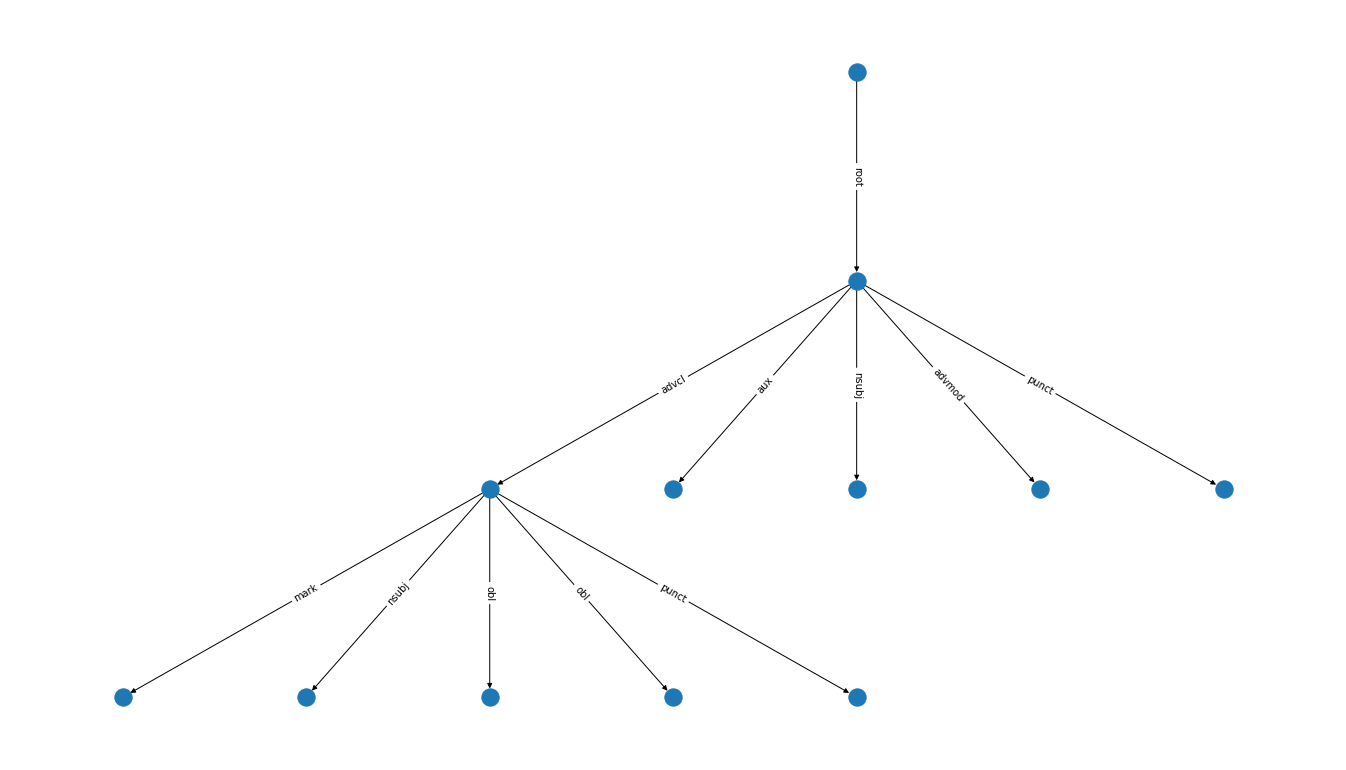

In [4]:
text = Text('Kui Arno isaga koolimajja jõudis, olid tunnid juba alanud.')
text.tag_layer('morph_extended')
stanza(text)
display(text['stanza_syntax'])
SyntaxTree(text['stanza_syntax']).drawGraph()

## II. Modified Entity extractor

In [5]:
obl_extractor = EntityTagger(deprel='obl', output_layer='entities')

In [8]:
text = Text('Kui Arno väriseva isaga rohelist värvi lagunevasse koolimajja jõudis, olid tunnid juba alanud.')
text.tag_layer('morph_extended')
stanza(text)
obl_extractor(text)
text['entities']

Layer(name='entities', attributes=('entity_type', 'free_entity', 'is_valid', 'root'), spans=SL[EnvelopingSpan(['väriseva', 'isaga'], [{'entity_type': None, 'free_entity': None, 'is_valid': None, 'root': <class 'estnltk_core.layer.span.Span'>}]),
EnvelopingSpan(['rohelist', 'värvi', 'lagunevasse', 'koolimajja'], [{'entity_type': None, 'free_entity': None, 'is_valid': None, 'root': <class 'estnltk_core.layer.span.Span'>}])])